### Présentation: 

Soit un semestre d'ecole avec 2 partiels. Les notes obtenues durant les partiels sont X1 et X2. La colonne 'y' (label)  contiendra l'indication de la réussite finale au semestre (examin final indépendant).
Avec '0' => echec  et  1 => réussite.
On cherche à construire un modèle prédictif qui repondra à la question : Recu ou recalé en fonction des notes intermédiaires.




In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Chargement des données

Les notes sont sur 100 points

In [3]:
dt = pd.read_csv('regressionlogis.csv', header = None, names =['X1', 'X2','y'])

In [4]:
dt

,X1,X2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1
...,...,...,...
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1


In [5]:
recu = dt['y']== 1

In [6]:
echec = ~recu

### Visualisation

Text(0, 0.5, 'note 2')

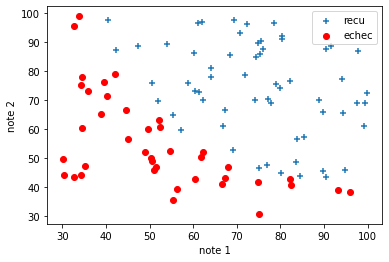

In [7]:
plt.scatter(dt['X1'][recu],dt['X2'][recu], marker='+' )
plt.scatter(dt['X1'][echec],dt['X2'][echec], marker='o' , color ='r' )
plt.legend(['recu', 'echec'])
plt.xlabel('note 1')
plt.ylabel('note 2')

In [8]:
X = dt[['X1','X2']].to_numpy()
y = dt['y'].to_numpy()

In [9]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


### Division des données en deux lots : entrainement et test

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.4)

## Utilisation du module LogisticRegression

LogisticRegression(solver='XXXX',  random_state=0).fit(X_train, y_train)


###  il est possible de jouer sur le parametre solver :  c'est le modèle pour trouver l'optimum 
valeur possible: newton-cg, lbfgs, liblinear, sag, saga  => default=lbfgs

## Test avec le moteur par default  'lbfgs'

In [28]:
clf = LogisticRegression(random_state= 0, solver= 'lbfgs').fit(X_train, y_train)
# random_state permet de reproduire à l'identique des composants 'random'


In [29]:
print(clf.score(X_test, y_test))
#  C est une methode propre au solver

0.8


### Visualisation du resultat 'recu' en haut et 'echec' en bas.

Text(0, 0.5, 'sortie binaire')

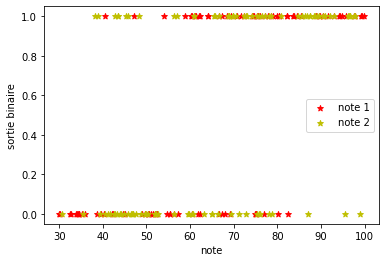

In [30]:
y_pred = clf.predict(X)
plt.scatter(X[:,0], y_pred, color="red", marker = '*')
plt.scatter(X[:,1], y_pred, color="y", marker = '*')
plt.legend(['note 1', 'note 2'])
plt.xlabel('note')
plt.ylabel('sortie binaire')


In [31]:
from sklearn.metrics  import confusion_matrix
y_pred_test = clf.predict(X_test)
conf = pd.DataFrame(confusion_matrix(y_test, y_pred_test, labels =[0, 1]))


###  Matrice de confusion
### Lecture:  0: echec , 1 admis 

ligne  : les observations

colonne : le predictif

Lecture en diagonale : en haut à gauche = > les cas vrais negatifs et vrais positifs:

Lecture en diagonale : en haut à droite = > les cas faux positifs et faux negatifs:

    

In [32]:
echec_test = y_test == 0
print(len(y_test[echec_test]))
print(len(y_test[~echec_test]))

echec_pred = y_pred_test == 0

print(len(y_pred_test[echec_pred]))
print(len(y_pred_test[~echec_pred]))

14
26
20
20


In [33]:
print(conf)

    0   1
0  13   1
1   7  19


### La  precision reflete la qualité , le recall la quantité, le f1 est une moyenne 

In [34]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_test, target_names=['echec', 'recu']))

              precision    recall  f1-score   support

       echec       0.65      0.93      0.76        14
        recu       0.95      0.73      0.83        26

    accuracy                           0.80        40
   macro avg       0.80      0.83      0.80        40
weighted avg       0.84      0.80      0.80        40



In [35]:
from sklearn.metrics  import accuracy_score,recall_score
print(accuracy_score(y, y_pred))
print(recall_score(y, y_pred))


0.88
0.85


In [36]:
print(clf.coef_, clf.intercept_)

[[0.29779645 0.25263474]] [-35.23208946]


### On prepare une suite continue de note de 0 à 100

### On calcule ensuite la probabilité obtenue en appliquant une fonction sigmoid sur une regression linéaire

In [37]:
from scipy.special import expit
Xlin = np.empty([100, 2])
Xlin[:,0] = np.linspace(0, 100, 100)
Xlin[:,1] = np.linspace(0, 100, 100)
               
ylin_pred = [expit(Xitem @ clf.coef_.T + clf.intercept_) for Xitem in Xlin]
#print(ylin_pred)

### Expliquer la dernière ligne  avec  l'opérateur '@'.

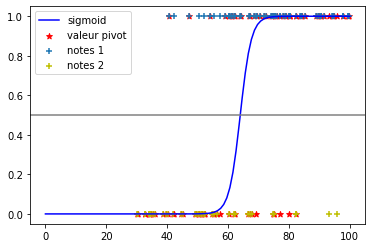

In [38]:
plt.plot(Xlin[:,0], ylin_pred, color="b")
y_pred = clf.predict(X)
plt.scatter(X[:,0], y_pred, color="red", marker = '*')
plt.scatter(dt['X1'][recu],dt['y'][recu], marker='+' )
plt.scatter(dt['X1'][echec],dt['y'][echec], marker='+' ,color ='y' )
plt.axhline(0.5, color=".5")
plt.legend(['sigmoid','valeur pivot', 'notes 1', 'notes 2'])

### Calculer le score pour la fonction sigmoid 

(astuce: convertir la probabilité en 0 ou 1  en fonction de la valeur 0.5 des y)

In [39]:
ylin_pred = [expit(Xitem @ clf.coef_.T + clf.intercept_) for Xitem in X_test]
ysig = np.ones((len(ylin_pred),1))
print(ysig.shape)
print(ylin_pred)
ysig= [0 if x < 0.5 else 1 for x in ylin_pred]               
print(ysig)

(40, 1)
[array([0.83728037]), array([0.00236488]), array([0.00046426]), array([0.99999537]), array([0.25852973]), array([0.99977211]), array([0.0054345]), array([0.9513011]), array([0.98921782]), array([0.99999154]), array([5.98683025e-05]), array([0.00021303]), array([0.99999947]), array([0.77528368]), array([0.51334466]), array([0.01594032]), array([0.9996955]), array([0.99993585]), array([0.00580947]), array([0.34496492]), array([0.99549585]), array([0.00151695]), array([0.81104307]), array([0.99995848]), array([0.0582368]), array([0.20764642]), array([0.97213459]), array([0.492941]), array([0.08722763]), array([2.70386494e-07]), array([0.03897321]), array([0.04104281]), array([0.00569848]), array([0.81076948]), array([0.00511607]), array([0.10047119]), array([0.9999869]), array([0.99999986]), array([0.99999186]), array([0.999999])]
[1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1]


In [40]:
conf2 = pd.DataFrame(confusion_matrix(y_test, ysig, labels =[0, 1]))
print(conf2)
print(classification_report(y_test, ysig, target_names=['echec', 'recu']))

    0   1
0  13   1
1   7  19
              precision    recall  f1-score   support

       echec       0.65      0.93      0.76        14
        recu       0.95      0.73      0.83        26

    accuracy                           0.80        40
   macro avg       0.80      0.83      0.80        40
weighted avg       0.84      0.80      0.80        40



### Que peut on en conclure ?

### La validation croisée

Le principe est de déplacer l'emplagement de collecte des données de test 

In [41]:
from sklearn.model_selection import cross_val_score
scores  = cross_val_score(clf, X_train, y_train, scoring='neg_mean_squared_error', cv =4 )

### Pour avoir des ordres de comparaison utiles, on utilisera l'inverse de la MSE (mean square error) 
#### Apres validation , il faudra inverser le résultat.
#### Mesures à retenir: la moyenne et l'ecart type.


In [42]:
scores = np.sqrt(-scores) 
print(scores)

print(scores.mean())
print(scores.std())

[0.         0.25819889 0.4472136  0.36514837]
0.26764021422930745
0.16843015088543503


### Refaire les essais avec un solver different  et comparer les résultats avec une validation croisée.

In [43]:
clf2 = LogisticRegression(random_state= 0, solver = 'lbfgs').fit(X_train, y_train)

In [44]:
print(clf2.score(X_test, y_test))

0.8


In [45]:
y_pred_test = clf2.predict(X_test)
conf = pd.DataFrame(confusion_matrix(y_test, y_pred_test, labels =[0, 1]))


In [46]:
print(conf)

    0   1
0  13   1
1   7  19


In [47]:
print(classification_report(y_test, y_pred_test, target_names=['echec', 'recu']))

              precision    recall  f1-score   support

       echec       0.65      0.93      0.76        14
        recu       0.95      0.73      0.83        26

    accuracy                           0.80        40
   macro avg       0.80      0.83      0.80        40
weighted avg       0.84      0.80      0.80        40



In [48]:
scores  = cross_val_score(clf2, X_train, y_train, scoring='neg_mean_squared_error', cv =4 )

In [49]:
scores = np.sqrt(-scores) 
print(scores)

print(scores.mean())
print(scores.std())

[0.         0.25819889 0.4472136  0.36514837]
0.26764021422930745
0.16843015088543503


### Calcul de deux points de la droite: 


In [50]:
plox = [min(dt['X1']) -2, max(dt['X1']) +2]
print(plox)

[28.05882244669796, 101.82785779692128]


In [51]:
print(clf.coef_)

t1_ploty = (-1/clf.coef_[0, 1])*(clf.coef_[0,0]* plox[0] + clf.intercept_)
t2_ploty =  (-1/clf.coef_[0, 1])*(clf.coef_[0,0]* plox[1] + clf.intercept_)
yb = [t1_ploty, t2_ploty]


[[0.29779645 0.25263474]]


Text(0, 0.5, 'note 2')

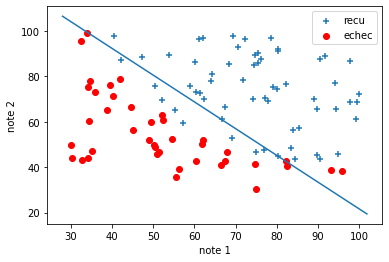

In [52]:
plt.scatter(dt['X1'][recu],dt['X2'][recu], marker='+' )
plt.scatter(dt['X1'][echec],dt['X2'][echec], marker='o' , color ='r' )
plt.plot(plox,yb )
plt.legend(['recu', 'echec'])
plt.xlabel('note 1')
plt.ylabel('note 2')


In [54]:
y_scores = clf.decision_function(X_test)

In [55]:
print(y_scores)

[  1.63813034  -6.04466074  -7.67459273  12.28193869  -1.05362435
   8.38639901  -5.20953839   2.97217427   4.51901961  11.68053852
  -9.7233035   -8.45384396  14.44339967   1.23839017   0.05339132
  -4.12283491   8.0965416    9.65424707  -5.14243937  -0.64124608
   5.39824253  -6.48953853   1.45680204  10.0892822   -2.78323632
  -1.33917097   3.55210808  -0.02823789  -2.34796538 -15.12341317
  -3.20512777  -3.15123076  -5.16184103   1.45501784  -5.27023971
  -2.19200006  11.24325908  15.7944065   11.71862515  13.81092876]


### Precision vs recall 

In [80]:
from sklearn.model_selection import cross_val_predict
y_scores2 =  cross_val_predict(clf, X_train, y_train, method="decision_function", cv =4)

In [83]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores2)

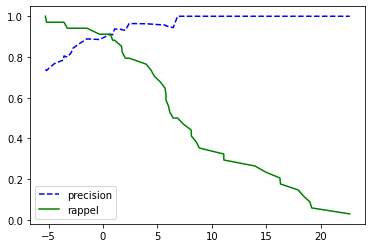

In [84]:
plt.plot(thresholds, precisions[:-1],"b--", label="precision")
plt.plot(thresholds, recalls[:-1],"g-", label="rappel")
plt.legend()

### Courbe ROC

In [85]:
from sklearn.metrics import roc_curve
fpr, tpr , seuil = roc_curve(y_train, y_scores2)


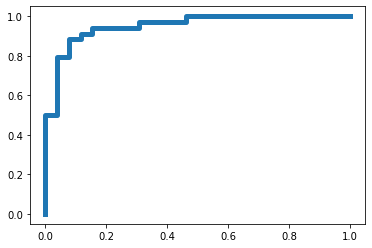

In [95]:
plt.plot(fpr, tpr, linewidth =5)

### Calcul de l'aire sous la courbe ROC

In [87]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_train, y_scores2))

0.9513574660633484


### Calcul de la probabilité

In [114]:
y_proba = clf.predict_proba( X_test)
y_pred   =clf.predict( X_test)

In [115]:
for cp, (itemn, itemp) in enumerate(y_proba):
    print(f"{itemp:.2f}  %%  {y_pred[cp]}")

0.84  %%  1
0.00  %%  0
0.00  %%  0
1.00  %%  1
0.26  %%  0
1.00  %%  1
0.01  %%  0
0.95  %%  1
0.99  %%  1
1.00  %%  1
0.00  %%  0
0.00  %%  0
1.00  %%  1
0.78  %%  1
0.51  %%  1
0.02  %%  0
1.00  %%  1
1.00  %%  1
0.01  %%  0
0.34  %%  0
1.00  %%  1
0.00  %%  0
0.81  %%  1
1.00  %%  1
0.06  %%  0
0.21  %%  0
0.97  %%  1
0.49  %%  0
0.09  %%  0
0.00  %%  0
0.04  %%  0
0.04  %%  0
0.01  %%  0
0.81  %%  1
0.01  %%  0
0.10  %%  0
1.00  %%  1
1.00  %%  1
1.00  %%  1
1.00  %%  1
